In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image

In [4]:
bs = 64

In [5]:
path = '/home/jupyter/.fastai/data/Fruit_database/'

In [6]:
fnames = get_image_files(path+'train/Banana'); fnames[:5]

[PosixPath('/home/jupyter/.fastai/data/Fruit_database/train/Banana/DSC_4891.jpg'),
 PosixPath('/home/jupyter/.fastai/data/Fruit_database/train/Banana/DSC_4910.jpg'),
 PosixPath('/home/jupyter/.fastai/data/Fruit_database/train/Banana/DSC_4923.jpg'),
 PosixPath('/home/jupyter/.fastai/data/Fruit_database/train/Banana/DSC_4921.jpg'),
 PosixPath('/home/jupyter/.fastai/data/Fruit_database/train/Banana/DSC_4897.jpg')]

In [7]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

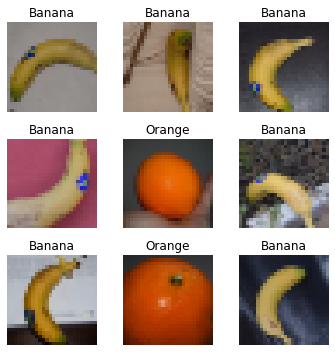

In [8]:
data.show_batch(rows=3, figsize=(5,5))

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [11]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.150550,0.711316,0.464286,00:02
1,1.206190,0.569488,0.250000,00:00
2,0.995837,0.437949,0.214286,00:00


In [12]:
learn.save('stage-1')

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

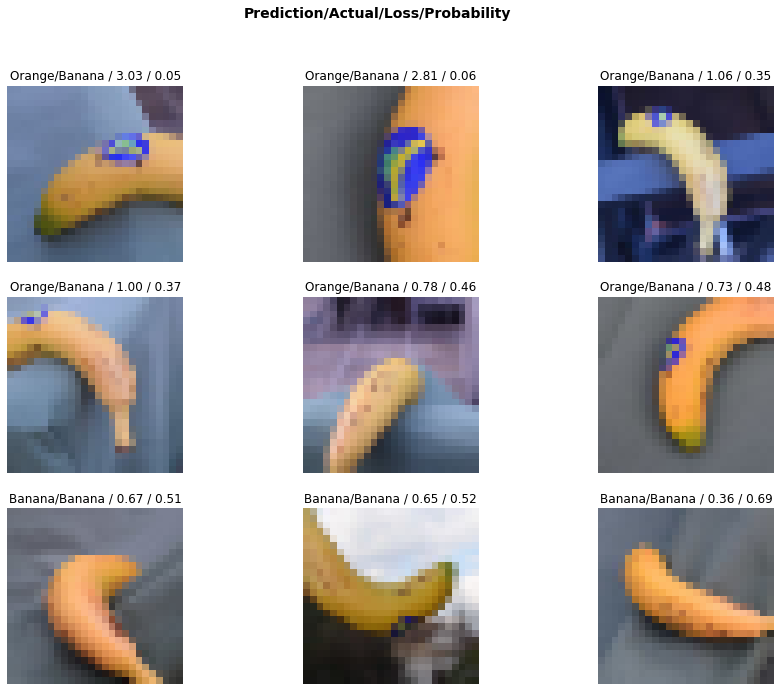

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

In [18]:
doc(interp.plot_top_losses)

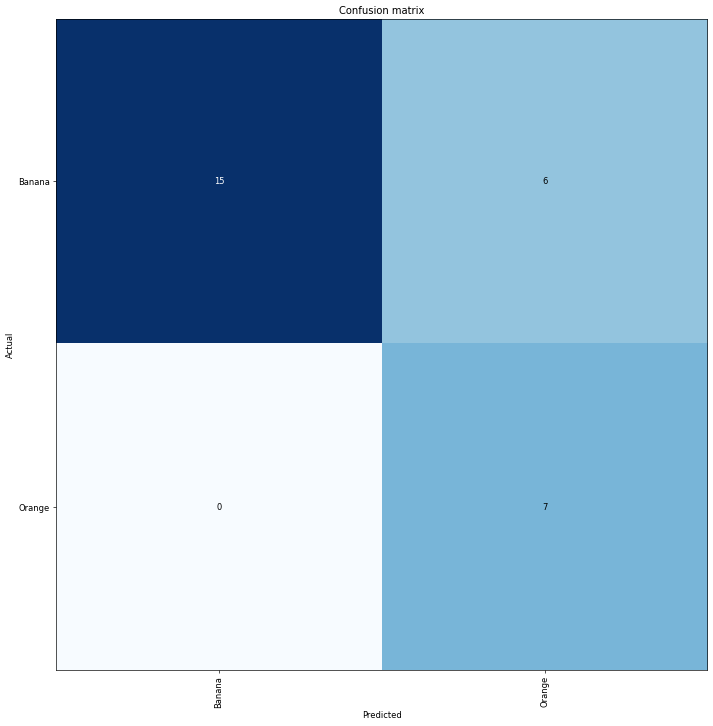

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
interp.most_confused(min_val=1)

[('Banana', 'Orange', 6)]

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.257092,0.320457,0.142857,00:00


In [19]:
learn.load('stage-1');

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


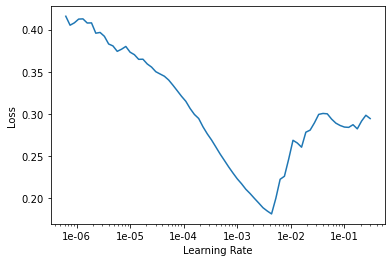

In [21]:
learn.recorder.plot()

In [22]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-3,5e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.281029,0.246896,0.071429,00:00
1,0.322709,0.132032,0.071429,00:00


## Training: resnet50

In [25]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

In [26]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/jupyter/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


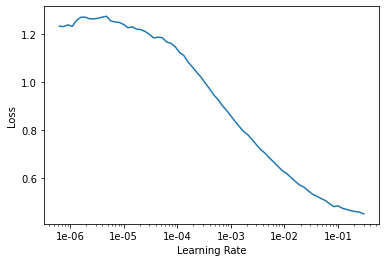

In [27]:
learn.lr_find()
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.198253,0.099523,0.071429,00:00
1,0.149182,0.102922,0.071429,00:00
2,0.155661,0.093825,0.035714,00:00


In [31]:
learn.save('stage-1-50')

In [32]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-2,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.218047,10.868141,0.750000,00:01
1,1.403706,681039298560.000000,0.250000,00:00
2,2.037663,64569026499575808.000000,0.750000,00:00


In [33]:
learn.load('stage-1-50');

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

In [36]:
interp.most_confused(min_val=1)

[('Orange', 'Banana', 1)]

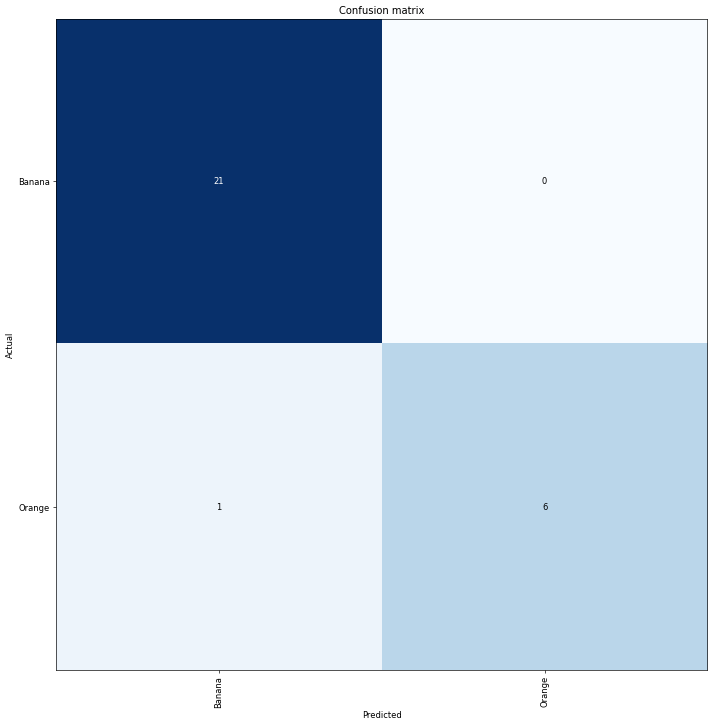

In [37]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

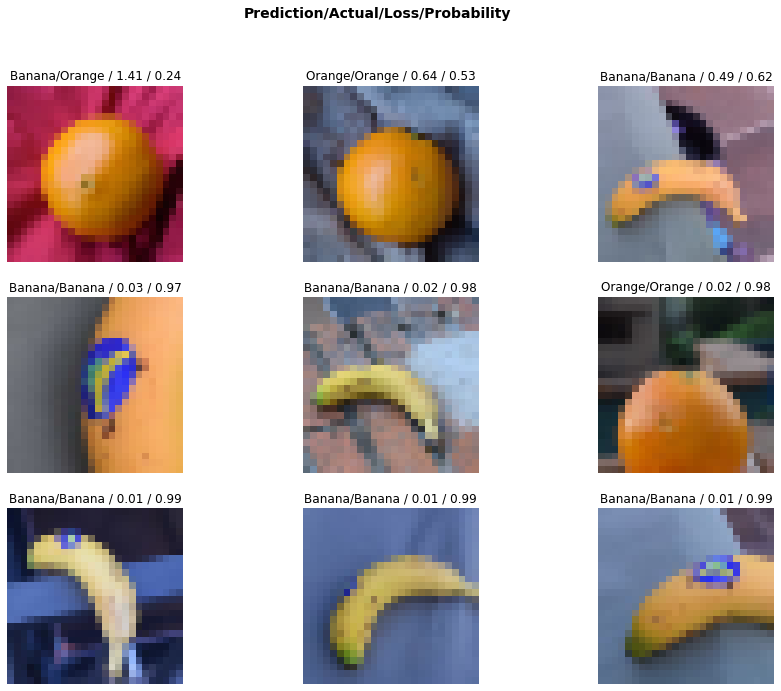

In [38]:
interp.plot_top_losses(9, figsize=(15,11))